# Indicators of heavy traffic in I94 highway

This project is about analysing the daily traffic conditions of the I94 highway in america, available [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume).
The main objective of this project is to determine the main factors that contribute to heavy traffic in the I94 highway

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
i94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv.gz")

In [4]:
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [5]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


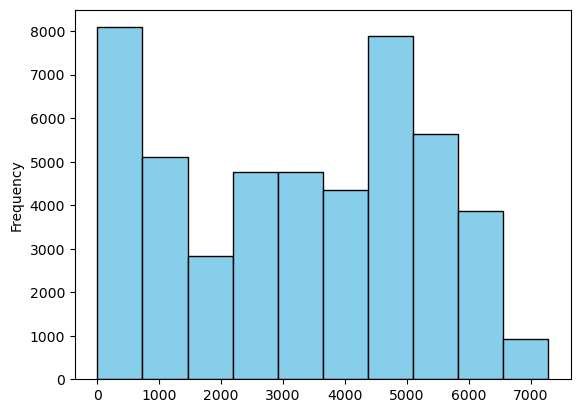

In [27]:
i94["traffic_volume"].plot.hist(color = "skyblue", edgecolor = "black")
plt.show()

In [28]:
i94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [17]:
i94["date_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48204 entries, 0 to 48203
Series name: date_time
Non-Null Count  Dtype 
--------------  ----- 
48204 non-null  object
dtypes: object(1)
memory usage: 376.7+ KB


In [18]:
i94["date_time"] = pd.to_datetime(i94["date_time"], format = "%Y-%m-%d %H:%M:%S")

In [23]:
daytime = i94[(i94["date_time"].dt.hour > 7) & (i94["date_time"].dt.hour < 19)]

In [24]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21798 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              21798 non-null  object        
 1   temp                 21798 non-null  float64       
 2   rain_1h              21798 non-null  float64       
 3   snow_1h              21798 non-null  float64       
 4   clouds_all           21798 non-null  int64         
 5   weather_main         21798 non-null  object        
 6   weather_description  21798 non-null  object        
 7   date_time            21798 non-null  datetime64[ns]
 8   traffic_volume       21798 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.7+ MB


In [25]:
nighttime = i94[~((i94["date_time"].dt.hour > 7) & (i94["date_time"].dt.hour < 19))]

In [26]:
nighttime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26406 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              26406 non-null  object        
 1   temp                 26406 non-null  float64       
 2   rain_1h              26406 non-null  float64       
 3   snow_1h              26406 non-null  float64       
 4   clouds_all           26406 non-null  int64         
 5   weather_main         26406 non-null  object        
 6   weather_description  26406 non-null  object        
 7   date_time            26406 non-null  datetime64[ns]
 8   traffic_volume       26406 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.0+ MB


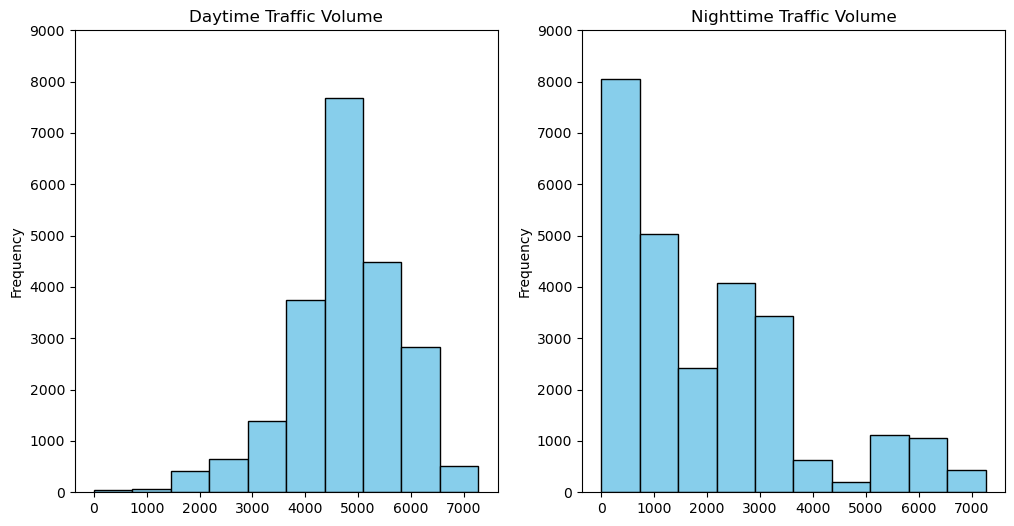

In [37]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
daytime["traffic_volume"].plot.hist(color="skyblue", edgecolor = "black")
plt.title("Daytime Traffic Volume")
plt.ylim(0,9000)

plt.subplot(1,2,2)
nighttime["traffic_volume"].plot.hist(color="skyblue", edgecolor = "black")
plt.title("Nighttime Traffic Volume")
plt.ylim(0,9000)

plt.show()

In [38]:
daytime["traffic_volume"].describe()

count    21798.000000
mean      4764.132948
std       1021.369570
min          0.000000
25%       4271.000000
50%       4792.000000
75%       5410.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [39]:
nighttime["traffic_volume"].describe()

count    26406.000000
mean      2018.015375
std       1713.201969
min          0.000000
25%        581.000000
50%       1485.000000
75%       2934.000000
max       7260.000000
Name: traffic_volume, dtype: float64

In [57]:
day = daytime.copy()

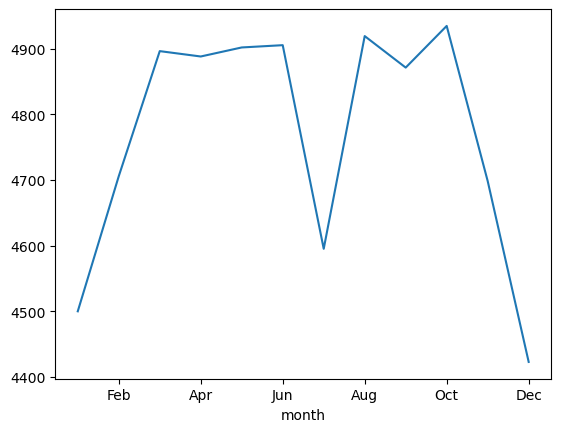

In [61]:
day["month"] = day.loc[:, "date_time"].dt.month
day.groupby("month").mean(numeric_only = True)["traffic_volume"].plot.line()
plt.xticks([2,4,6,8,10,12], ["Feb", "Apr","Jun", "Aug", "Oct", "Dec"])
plt.show()

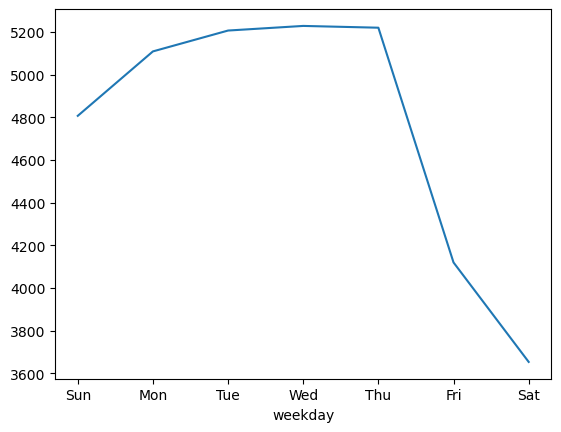

In [67]:
day["weekday"] = day["date_time"].dt.dayofweek
day.groupby("weekday").mean(numeric_only = True)["traffic_volume"].plot.line()
plt.xticks([0,1,2,3,4,5,6], ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
plt.show()

In [69]:
day["hour"] = day["date_time"].dt.hour
weekday = day.copy()[day["weekday"] < 5]
weekend = day.copy()[day["weekday"] >= 5]

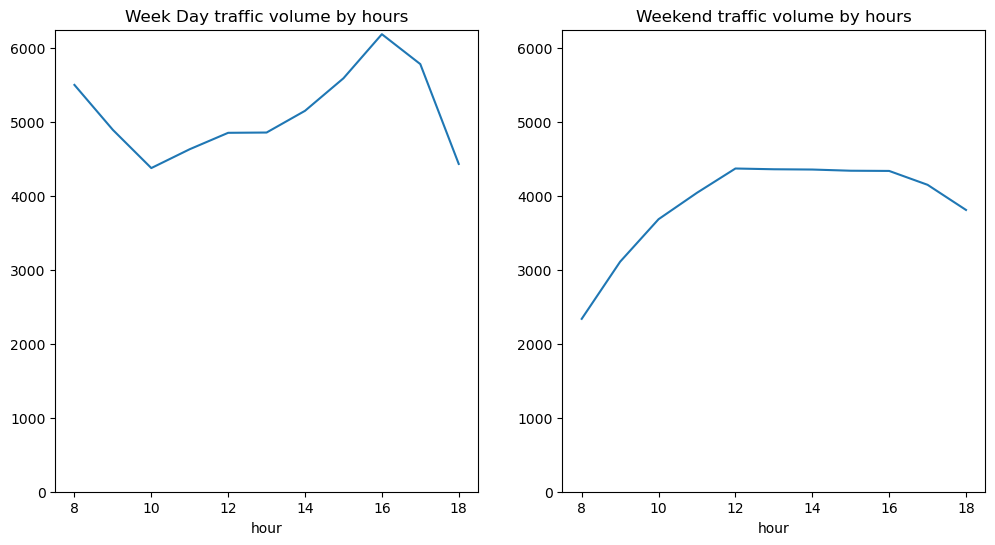

In [71]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
weekday.groupby("hour").mean(numeric_only=True)["traffic_volume"].plot.line()
plt.title("Week Day traffic volume by hours")
plt.ylim(0,6250)

plt.subplot(1,2,2)
weekend.groupby("hour").mean(numeric_only = True)["traffic_volume"].plot.line()
plt.title("Weekend traffic volume by hours")
plt.ylim(0,6250)

plt.show()

## Summary of analysis of time indicators for heavy traffic during the day
- There was considerably less traffic in the night time (7pm to 7am) than in the day time (7am to 7pm), so the day time data was more closely looked at
- looking at traffic volume in the day according to month, it was low in Jan, Feb, Jul, nov, dec and high at other months
- looking at traffic volume in the day according to the week day, it was high in the weekdays and low in the weekend
- looking at traffic volume separately for the weekends and weekdays according to the time of day, we found for weekdays, the traffic is lowest at 10am, highest at 4pm with fluctuations in between. And for the weekend the traffic volume slowly rises from 8, platues from 12 to 4 before gradually decreasing till 6pm

In [76]:
day.corr(numeric_only = True)["traffic_volume"]

temp              0.145568
rain_1h           0.004704
snow_1h           0.002119
clouds_all       -0.038819
traffic_volume    1.000000
month            -0.018321
weekday          -0.376709
hour              0.233560
Name: traffic_volume, dtype: float64

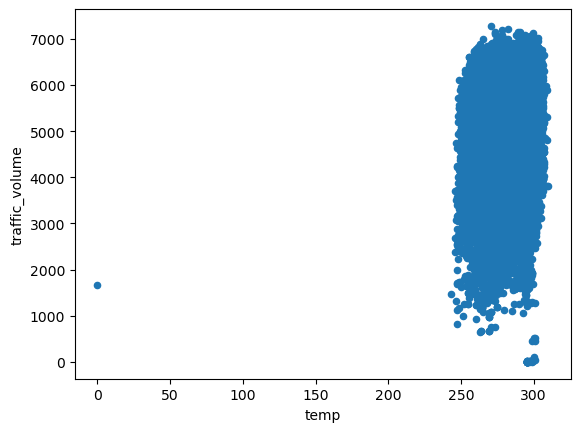

In [79]:
day.plot.scatter(x = "temp", y = "traffic_volume")
plt.show()

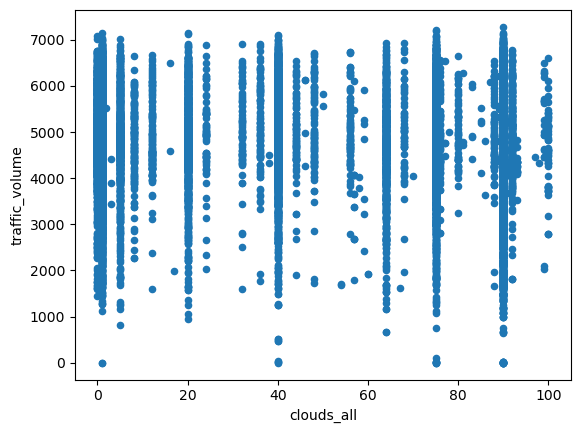

In [80]:
day.plot.scatter(x = "clouds_all", y = "traffic_volume")
plt.show()

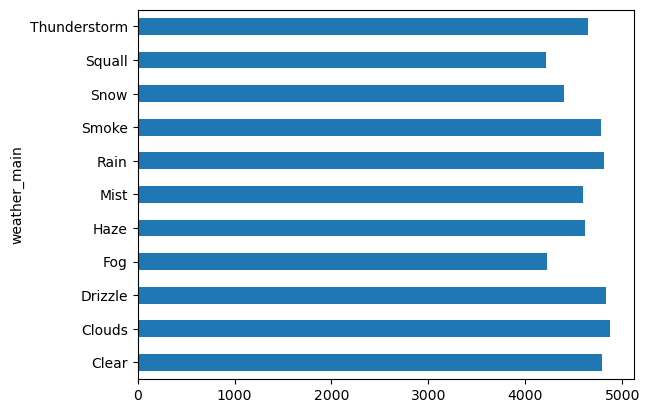

In [84]:
by_weather_main = day.groupby("weather_main")
by_weather_main.mean(numeric_only = True)["traffic_volume"].plot.barh()
plt.show()

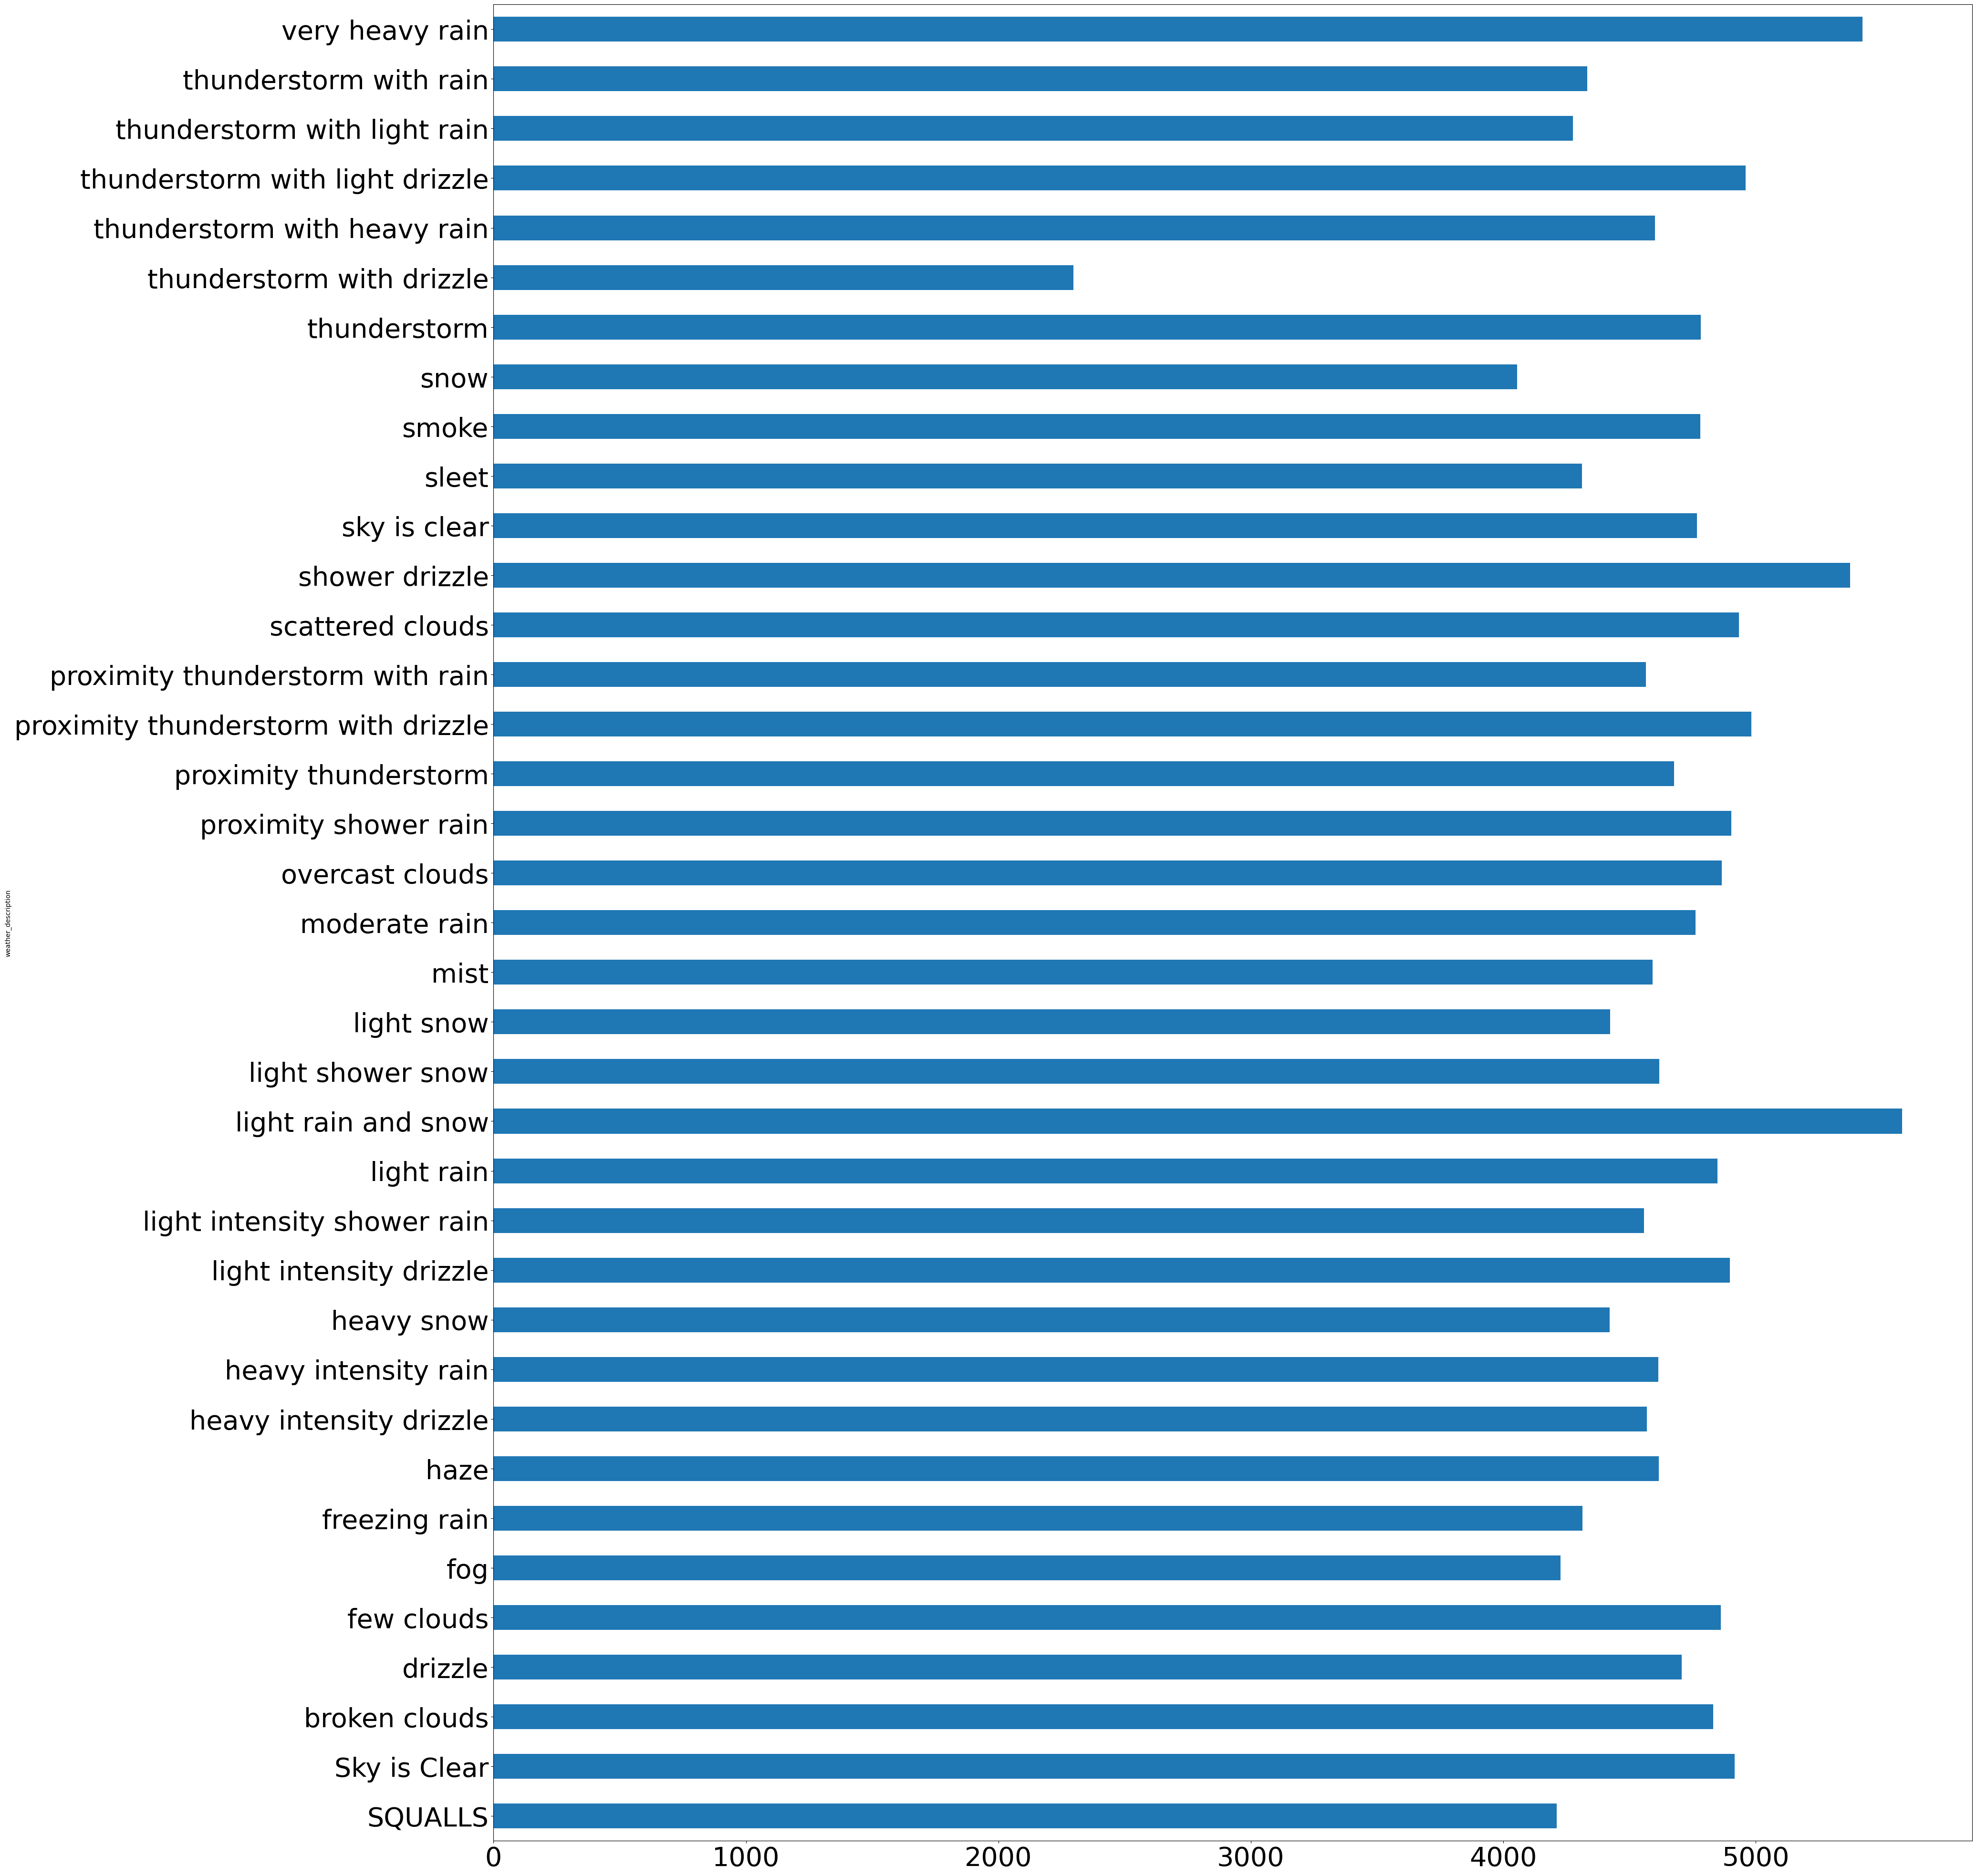

In [103]:
by_weather_description = day.groupby("weather_description")
by_weather_description.mean(numeric_only = True)["traffic_volume"].plot.barh(figsize = (40, 50))
plt.yticks(fontsize = 40)
plt.xticks(fontsize = 40)
plt.show()

## Summary of analysis of weather indicators for heavy traffic during the day
- There was no satisfactory correlation between the temperature, rain, snow, clouds and the traffic volume
- There were no significant weather main category, which caused traffic volume to be high
- for the weather description, traffic volume excedded 5000 during rainy weather such as light rain and snow, shower drizzle, very heavy rain